<a href="https://colab.research.google.com/github/PhanindraSikhakolli/Sentiment-analysis-of-online-product-reviews/blob/main/Ml_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re

**Reading the Dataset

In [ ]:
dataset = pd.read_csv("latest_samsung_mobiles_reviews-1.csv")

In [ ]:
dataset.head()

,titles,reviews,ratings
0,\nWorst service provided by Amazon Don't buy t...,"\nPlease , Don't buy this product ""samsung gal...",1.0
1,\nNot up to the standard\n,\nordered on 12/10/2022 compared to old Samsun...,1.0
2,\nWe are ditched\n,\nVery poor Quality phone has been sent to us ...,1.0
3,\nDON'T BUY THIS PHONE\n,\nBought it after seeing 4 star ratings and go...,1.0
4,\nToo slow processor\n,\nI want this product for normal use.....But t...,1.0


In [ ]:
dataset.tail()

,titles,reviews,ratings
3001,NaN,NaN,NaN
3002,NaN,\n\n\n\n\n The media could ...,NaN
3003,NaN,\nPhone hanging or spekar to no audio bar bar...,NaN
3004,NaN,\n\n\n\n\n The media could ...,NaN
3005,NaN,\nPhone hanging or spekar to no audio bar bar...,NaN


**Analyse the dataset

In [ ]:
dataset.describe()

,ratings
count,3000.000000
mean,2.819000
std,1.479967
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   titles   3000 non-null   object 
 1   reviews  2950 non-null   object 
 2   ratings  3000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 70.6+ KB


In [ ]:
dataset.shape

(3006, 3)

**Handling missing values

In [ ]:
dataset.isnull().sum()

titles      6
reviews    56
ratings     6
dtype: int64

In [ ]:
dataset['reviews'] = dataset['reviews'].fillna('').apply(str)
dataset

,titles,reviews,ratings
0,\nWorst service provided by Amazon Don't buy t...,"\nPlease , Don't buy this product ""samsung gal...",1.0
1,\nNot up to the standard\n,\nordered on 12/10/2022 compared to old Samsun...,1.0
2,\nWe are ditched\n,\nVery poor Quality phone has been sent to us ...,1.0
3,\nDON'T BUY THIS PHONE\n,\nBought it after seeing 4 star ratings and go...,1.0
4,\nToo slow processor\n,\nI want this product for normal use.....But t...,1.0
...,...,...,...
3001,NaN,,NaN
3002,NaN,\n\n\n\n\n The media could ...,NaN
3003,NaN,\nPhone hanging or spekar to no audio bar bar...,NaN
3004,NaN,\n\n\n\n\n The media could ...,NaN


In [ ]:
dataset.dropna(inplace=True)
dataset

,titles,reviews,ratings
0,\nWorst service provided by Amazon Don't buy t...,"\nPlease , Don't buy this product ""samsung gal...",1.0
1,\nNot up to the standard\n,\nordered on 12/10/2022 compared to old Samsun...,1.0
2,\nWe are ditched\n,\nVery poor Quality phone has been sent to us ...,1.0
3,\nDON'T BUY THIS PHONE\n,\nBought it after seeing 4 star ratings and go...,1.0
4,\nToo slow processor\n,\nI want this product for normal use.....But t...,1.0
...,...,...,...
2995,\nCamera quality is very poor\n,\nWorst product from Samsung. Never buy any Sa...,2.0
2996,\nLow quality product and replacement/return i...,"\nUsed phone delivered, guys don't buy this ph...",1.0
2997,\nBad quality m52\n,\nBakbass product\n,1.0
2998,\nLow quality product and replacement/return i...,\nthere is no return policy on this product on...,1.0


In [ ]:
dataset.isnull().sum()

titles     0
reviews    0
ratings    0
dtype: int64

In [ ]:
dataset['ratings'].value_counts()

1.0    793
2.0    633
5.0    593
3.0    491
4.0    490
Name: ratings, dtype: int64

<Axes: ylabel='ratings'>

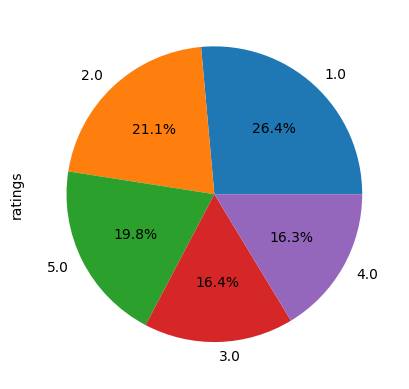

In [ ]:
dataset['ratings'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
a=[]
a=dataset["ratings"].tolist()
len(a)

3000

In [ ]:
d=[]
for i in range(len(a)):
    if a[i]>3:
        d.append(1)
    elif a[i]<=3 and a[i]>=2:
        d.append(0)
    else:
        d.append(-1)
d

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

In [ ]:
dt=pd.DataFrame(d,columns=['emotion'])
dt

,emotion
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
2995,0
2996,-1
2997,-1
2998,-1


In [ ]:
data1=pd.concat([dataset,dt],axis=1)
data1.head()

,titles,reviews,ratings,emotion
0,\nWorst service provided by Amazon Don't buy t...,"\nPlease , Don't buy this product ""samsung gal...",1.0,-1
1,\nNot up to the standard\n,\nordered on 12/10/2022 compared to old Samsun...,1.0,-1
2,\nWe are ditched\n,\nVery poor Quality phone has been sent to us ...,1.0,-1
3,\nDON'T BUY THIS PHONE\n,\nBought it after seeing 4 star ratings and go...,1.0,-1
4,\nToo slow processor\n,\nI want this product for normal use.....But t...,1.0,-1


In [ ]:
data1["Review"]=data1[["titles","reviews"]].agg(' '.join,axis=1)
data1.drop(['titles','reviews','ratings'],axis=1,inplace=True)
data2=data1
data2

,emotion,Review
0,-1,\nWorst service provided by Amazon Don't buy t...
1,-1,\nNot up to the standard\n \nordered on 12/10/...
2,-1,\nWe are ditched\n \nVery poor Quality phone h...
3,-1,\nDON'T BUY THIS PHONE\n \nBought it after see...
4,-1,\nToo slow processor\n \nI want this product f...
...,...,...
2995,0,\nCamera quality is very poor\n \nWorst produc...
2996,-1,\nLow quality product and replacement/return i...
2997,-1,\nBad quality m52\n \nBakbass product\n
2998,-1,\nLow quality product and replacement/return i...


In [ ]:
data2.shape

(3000, 2)

In [ ]:
data2['emotion'].value_counts()

 0    1124
 1    1083
-1     793
Name: emotion, dtype: int64

<Axes: ylabel='emotion'>

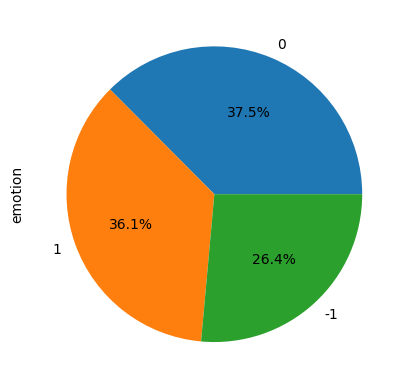

In [ ]:
data2['emotion'].value_counts().plot(kind='pie',autopct='%1.1f%%')

**Data Visualization

<Axes: ylabel='count'>

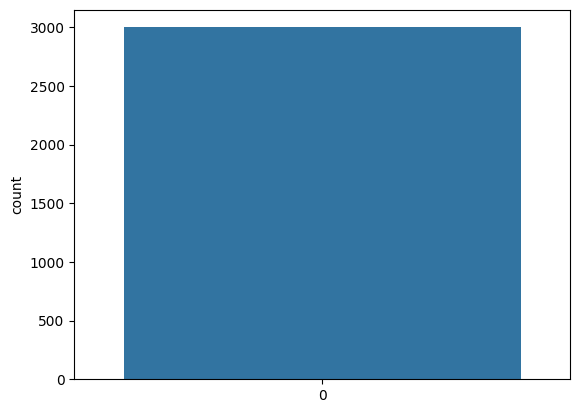

In [ ]:
import seaborn as sns
sns.countplot(data2['emotion'])
#sns.countplot(data2['Review'])

<ipython-input-29-cf4b07da6b47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2["emotion"])


<Axes: xlabel='emotion', ylabel='Density'>

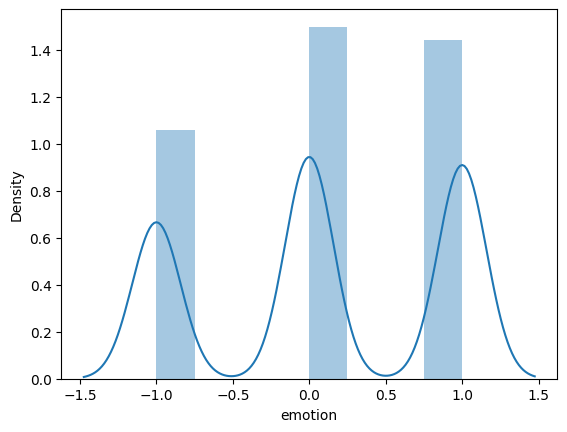

In [ ]:
sns.distplot(data2["emotion"])

<Axes: >

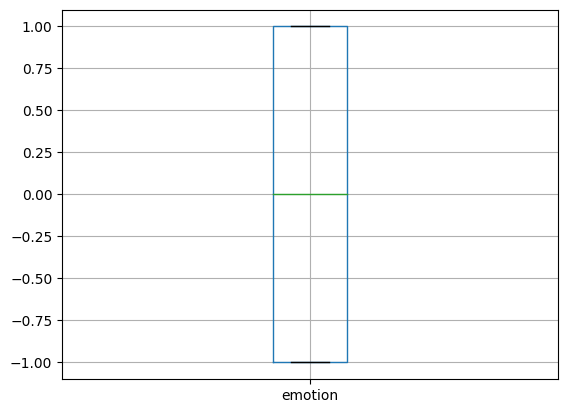

In [ ]:
data2.boxplot(column='emotion')

**NLP Techniques

import string
def text_clean(Review):
    Review=Review.lower()
    Review=re.sub('\[.*?\]','',Review)
    Review=re.sub('[%s]' % re.escape(string.punctuation),'',Review)
    Review=re.sub(r'\d+','',Review)
    Review=re.sub('\w*\d\w*','' ,Review)
    Review=re.sub('[''""...]','',Review)
    Review=Review.strip()
    Review=re.sub('\n','',Review)
    return Review
cleaned=lambda x:text_clean(x)

data2['cleaned_description']=pd.DataFrame(data2.Review.apply(cleaned))
data2.head(10)

data2['cleaned_description'].head().apply(text_clean)

data2.drop(['Review'],axis=1,inplace=True)
data2

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
stp_words=stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def clean_review(review):
    review=review.lower()
    nopunc=[char for char in review if char not in string.punctuation]
    nopunc=''.join(nopunc)
    cleanreview=" ".join(ps.stem(word) for word in review if word not in stp_words)
    cleanreview=" ".join(wordnet.lemmatize(word) for word in review.split() if word not in stp_words)
    return cleanreview

data2['Review']=data2['Review'].apply(clean_review)

In [ ]:
data2.head(10)

,emotion,Review
0,-1,worst service provided amazon buy this. please...
1,-1,standard ordered 12/10/2022 compared old samsu...
2,-1,ditched poor quality phone sent u . span 10 da...
3,-1,buy phone bought seeing 4 star rating good! re...
4,-1,slow processor want product normal use.....but...
5,-1,worth hype money - samsung look design quality...
6,-1,series phone software . aery range software da...
7,-1,bad display. contact app pathetic display way ...
8,-1,waste money phone. waste money phone. forget a...
9,-1,worst mobile samsung amazon fooled people.this...


**Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data2['Review'],data2['emotion'],test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(2400,)

In [ ]:
X_test.shape

(600,)

In [ ]:
y_train.shape

(2400,)

In [ ]:
y_test.shape

(600,)

**Logistic Regression - Accuracy - 91%

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec=TfidfVectorizer()
clf = LogisticRegression(solver='lbfgs')
classifier=Pipeline([('vectorizer',tvec),('classifier',clf)])
classifier.fit(X_train, y_train)

**SVM - Accuracy - 93%

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
tvec=TfidfVectorizer()
clf = LinearSVC()
classifier=Pipeline([('reduce_dim',tvec),('classifier',clf)])
classifier.fit(X_train, y_train)

**Naive Bayes - Accuracy - 84%

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
tvec=TfidfVectorizer()
clf = MultinomialNB()
classifier=Pipeline([('binarizer',tvec),('multinomialnb',clf)])
classifier.fit(X_train, y_train)

**Random Forest - Accuracy - 95%

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
tvec=TfidfVectorizer()
clf= RandomForestClassifier()
classifier=Pipeline([('vectorizer',tvec),('classifier',clf)])
classifier.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

**Gradient Boosting-85%

In [ ]:
print(classifier.predict(X_train))

print(y_train.values)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred=classifier.predict(X_train)
print(classification_report(y_train,pred))
print()
print('Confusion Matrix : \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ',accuracy_score(y_train,pred)*100)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       636
           0       1.00      0.99      0.99       901
           1       0.99      1.00      0.99       863

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400


Confusion Matrix : 
 [[636   0   0]
 [  0 891  10]
 [  0   0 863]]

Accuracy:  99.58333333333333


In [ ]:
print(classifier.predict(X_test))
print(y_test.values)

[-1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1  0  0  0 -1 -1  0  1  0  0
 -1  0  0 -1  0  0 -1 -1 -1  1  0  0  1  0  1  0  0  1  0  0  1 -1  0  0
  1  0 -1  0 -1 -1 -1  1  0  1  0  0  0  0  0  0 -1  1  1  1  1  0  0  0
  1  0 -1  0 -1  0  1  0  1 -1 -1  0 -1  1  0 -1  0  0 -1  1  0  1  1  1
  0  0 -1  0  0 -1  1  0  0  0 -1  1 -1  1 -1  1 -1  1 -1 -1 -1  0 -1  0
  1  0 -1  0  0 -1 -1  1  1  1  0 -1  0  1  1  0 -1  0  1  0 -1  0  0  1
  1  0 -1  0 -1  1  0  1  1  0  1  0  0 -1  1  1  0  1  1  1  0  1  1  1
 -1  0 -1 -1 -1  0  0  1  0 -1  1  0  1 -1 -1  0  1  0  0  1  0  0  1  1
  1  0  0 -1  1 -1 -1  1  0 -1 -1 -1  0  0  1  1  1 -1  0  1 -1  0  0  1
  0 -1 -1  0  0  1 -1  1  0 -1  0  0  0 -1  1  1  0 -1  0  1 -1 -1  1  1
  1  0  1  1  0  0  1  1  1  0  1  0 -1 -1  1  0  1  1  1  0  0  1  1  1
  0  1  0  1  1  1  1  1  0  1  0  1 -1 -1  1  1 -1  0  0  1  0  0  1  1
  0  1 -1  0  1  0  0  1  1  0  0  0  1  0  0 -1  0  0  1  1 -1  0  0  1
 -1  1  1  1  1  1 -1  1  1  0  0  0  0  0 -1  0 -1

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred=classifier.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix : \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ',accuracy_score(y_test,pred)*100)

              precision    recall  f1-score   support

          -1       0.96      0.90      0.93       157
           0       0.95      0.95      0.95       223
           1       0.94      0.99      0.96       220

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600


Confusion Matrix : 
 [[142   8   7]
 [  6 211   6]
 [  0   3 217]]

Accuracy:  95.0


<ipython-input-40-78cb056b8aa8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred)


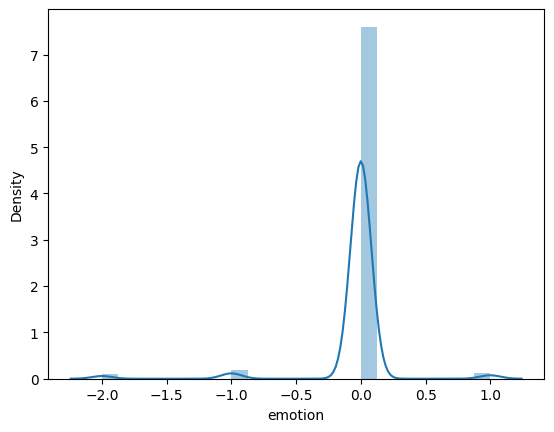

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(y_test-pred)
plt.show()

Text(0.5, 19.049999999999997, 'predicted label')

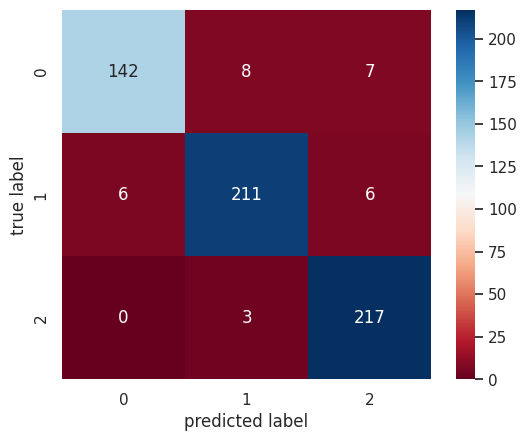

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat= confusion_matrix(y_test, pred)
axes=sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,cmap=plt.cm.RdBu)
plt.ylabel('true label')
plt.xlabel('predicted label')

**Saving the model

In [ ]:
import pickle
pickle.dump(classifier,open('119.pkl','wb'))
model = pickle.load(open('119.pkl','rb'))

In [ ]:
pred = classifier.predict(X_test)
pred = pred>0.5

**Testing the model

In [ ]:
text = ["waste product"]
yp = classifier.predict(text)
print(yp)

[-1]


In [ ]:
text = ["I Love this Product, quality is good"]
yp = classifier.predict(text)
print(yp)

[1]


In [ ]:
text = ["It seems 1 size small ... please order 1 size bigger.....so if you are 8 let say order 9.... because this shoes is very compact and doesn't give much space for your toes to move ...and it hurts when you walk....so take one extra size to move those toes ... Quality wise it's fine at this price ,...... If you have knee or foot problem....then better go for good brands with cushioning...... I don't know what is the sole material seems like EVA....not sure........I'm not happy with the sole materials being used in today's shoes ...lot many people get foot problem because of poor quality soles used in today's shoes or slippers..."]

yp = classifier.predict(text)
print(yp)

[-1]


In [ ]:
text = ["Performance is good charging is fast and enough for average user UI is good no bloatwares Design is ok ok not greaCamera quality is not good selfie camera is worst if you are buying this phone for camera you will be disappointed"]
yp = classifier.predict(text)
print(yp)

[0]


In [ ]:
text =['The camera is like the worst ever any phone has released for 20k price range. Even though they say it has 108mp cam the processor does not support it. You cant record a video at 1080p 60 fps and the biggest joke redmi note 5 pro had that feature. They say the phone has amoled display but the processor again doesn0t support 4k videos or neither does it support hdr+. The previous phone redmi note 10 pro had the feature.So overall this phone is a total downgrade if you are looking for an upgrade. The only positive is that this phone has 5g support which is not really necessary.I used Mi 10i previously and i can assure you that it was a much better phone in every aspect compared to this phone.The only thing I didnot have in that phone was an Amoled display and i donot really thing Amoled display is better than having all the other features mi 10i had compared to this phone.Anyways this phone is for those who does not care about camera.All other features are actually good.']

yp = classifier.predict(text)
print(yp)

[-1]
